## Descarga de datos Sinergox y procesamiento de datos

In [ ]:
# Descarga de API de XM
!pip install pydataxm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 5.1 MB/s eta 0:00:00
  Created wheel for pydataxm: filename=pydataxm-0.3.4-py3-none-any.whl size=4373 sha256=e949b660620b615444ad1046fb9ea8aca8f39ee2310b1443e710ab8b582ae67d
  Stored in directory: /root/.cache/pip/wheels/96/53/72/83cc2365f9375766c5d3fe0ecd084e09f08ead718397add148
Successfully built pydataxm


In [54]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importación de librerías
from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar
from pydataxm.pydataxm import ReadDB as apiXM
import datetime as dt
import pandas as pd
from pathlib import Path
import os
import seaborn as sns

In [ ]:
# Se almacena el servicio en el nombre objetoAPI
objetoAPI = pydataxm.ReadDB()

In [ ]:
# Obtener las colecciones de datos disponibles
df =objetoAPI.get_collections()

In [ ]:
# Descargar la información a un csv
df.to_csv('Collections.csv',index=False)
df.head(5)

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
0,DemaReal,Demanda Real por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Demanda de usuarios regulados y no regulados q...
1,DemaReal,Demanda Real por Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Demanda de usuarios regulados y no regulados q...
2,ExpoMoneda,Exportaciones Moneda por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,COP,Transferencias de Energia desde Colombia hacia...
3,DemaCome,Demanda Comercial por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...
4,Gene,Generación por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Generacion neta de cada una de las plantas Nac...


In [ ]:
# Definir fechas para descargar la información
FechaIni=dt.date(2013, 1, 1)
FechaFin=dt.date(2016, 12, 31)

### Descarga de la demanda real en Kwh

In [ ]:
df_DemReal= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "DemaReal",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta

In [ ]:
# Visualizar información del dataset
df_DemReal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 29
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             1461 non-null   object        
 1   Values_code    1461 non-null   object        
 2   Values_Hour01  1461 non-null   float64       
 3   Values_Hour02  1461 non-null   float64       
 4   Values_Hour03  1461 non-null   float64       
 5   Values_Hour04  1461 non-null   float64       
 6   Values_Hour05  1461 non-null   float64       
 7   Values_Hour06  1461 non-null   float64       
 8   Values_Hour07  1461 non-null   float64       
 9   Values_Hour08  1461 non-null   float64       
 10  Values_Hour09  1461 non-null   float64       
 11  Values_Hour10  1461 non-null   float64       
 12  Values_Hour11  1461 non-null   float64       
 13  Values_Hour12  1461 non-null   float64       
 14  Values_Hour13  1461 non-null   float64       
 15  Values_Hour14  1461 non

In [ ]:
# Revisar las primeras columnas de python
df_DemReal.head(5)

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,6305062.32,6000901.66,5822162.62,5714775.86,5687318.20,5635097.98,5570870.20,5879061.50,...,6767623.08,6693124.20,6881993.55,7969518.57,8109994.61,8042718.85,7705385.29,7104796.74,6647457.66,2016-12-11
1,Sistema,Sistema,6213044.66,5973096.97,5854965.28,5857599.33,6036529.94,6343650.70,6616595.27,7222792.78,...,8606467.55,8450948.12,8568006.46,9356499.60,9327112.97,9060044.23,8533857.03,7781582.75,7045369.97,2016-12-12
2,Sistema,Sistema,6551083.70,6271348.95,6124689.87,6108195.14,6279899.85,6555176.14,6796319.05,7328915.46,...,8686501.17,8599618.25,8611363.75,9351720.72,9305509.39,9003869.88,8423818.23,7695981.08,6961901.15,2016-12-13
3,Sistema,Sistema,6506041.93,6237798.45,6114122.66,6117542.27,6317136.40,6717662.99,6993954.46,7538475.34,...,8841662.54,8690645.94,8712294.42,9445119.92,9462884.20,9159650.10,8594121.29,7908550.45,7174065.84,2016-12-14
4,Sistema,Sistema,6689761.98,6411196.88,6259690.65,6196089.38,6338918.25,6692284.21,6957638.89,7501612.97,...,8801594.03,8638477.48,8699695.61,9460576.60,9426762.81,9128916.67,8613190.27,7916354.52,7172019.44,2016-12-15


In [ ]:
# Ordenar los datos del menos al mayor por fecha
df_DemReal.sort_values(by='Date',inplace=True)
df_DemReal.head(5)

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,5635708.86,5398892.95,5132168.81,4886320.69,4735282.07,4600366.10,4191281.50,4238564.93,...,4902726.97,4851355.24,5011514.51,6182094.65,6575833.59,6404620.48,6030687.13,5524625.21,5075124.98,2013-01-01
1,Sistema,Sistema,4733353.34,4558484.10,4465636.32,4423877.64,4506324.62,4746253.12,4904013.89,5432078.28,...,7083721.91,6971104.19,6961467.87,7919680.47,8160177.85,7885390.47,7284289.49,6551408.98,5772277.59,2013-01-02
2,Sistema,Sistema,5354919.55,5147422.97,5019119.29,4969749.85,5067913.13,5293622.14,5410416.53,5901351.56,...,7275530.76,7238539.75,7197678.71,8170229.93,8309259.52,8004102.01,7405057.82,6651249.35,5936580.25,2013-01-03
3,Sistema,Sistema,5516668.52,5248061.57,5122929.23,5069243.05,5159958.91,5404919.40,5511566.54,5975775.54,...,7384011.60,7285251.59,7225135.25,8151944.09,8445414.55,8035545.90,7522287.39,6770324.67,6065261.28,2013-01-04
4,Sistema,Sistema,5672568.77,5399333.37,5228292.51,5160827.34,5233593.05,5369703.56,5363632.84,5739147.43,...,6766334.97,6639307.10,6729450.41,7813983.41,8087869.54,7802352.92,7290646.39,6685579.38,5948679.78,2013-01-05


In [ ]:
# Capturar los periodos
periodos=list(df_DemReal.columns[2:26])
periodos

['Values_Hour01',
 'Values_Hour02',
 'Values_Hour03',
 'Values_Hour04',
 'Values_Hour05',
 'Values_Hour06',
 'Values_Hour07',
 'Values_Hour08',
 'Values_Hour09',
 'Values_Hour10',
 'Values_Hour11',
 'Values_Hour12',
 'Values_Hour13',
 'Values_Hour14',
 'Values_Hour15',
 'Values_Hour16',
 'Values_Hour17',
 'Values_Hour18',
 'Values_Hour19',
 'Values_Hour20',
 'Values_Hour21',
 'Values_Hour22',
 'Values_Hour23',
 'Values_Hour24']

In [ ]:
# Exportar información a archivo csv
df_DemReal.to_csv('Data.csv')

In [47]:
# Obtener la demanda del día
df_Demdia=df_DemReal.copy()
df_Demdia['DemandaDia']=0
for hour in periodos:
  df_Demdia['DemandaDia']=df_Demdia['DemandaDia'] + df_Demdia[hour]
df_Demdia['DemandaDia']=df_Demdia['DemandaDia']

In [48]:
# Dejar el dataframe sólo con las columas requeridas
df_Demdia=df_Demdia[['Date','DemandaDia']]


In [49]:
df_Demdia

,Date,DemandaDia
0,2013-01-01,1.236392e+08
1,2013-01-02,1.498661e+08
2,2013-01-03,1.579180e+08
3,2013-01-04,1.604141e+08
4,2013-01-05,1.545963e+08
...,...,...
16,2016-12-27,1.769370e+08
17,2016-12-28,1.780500e+08
18,2016-12-29,1.775645e+08
19,2016-12-30,1.718543e+08


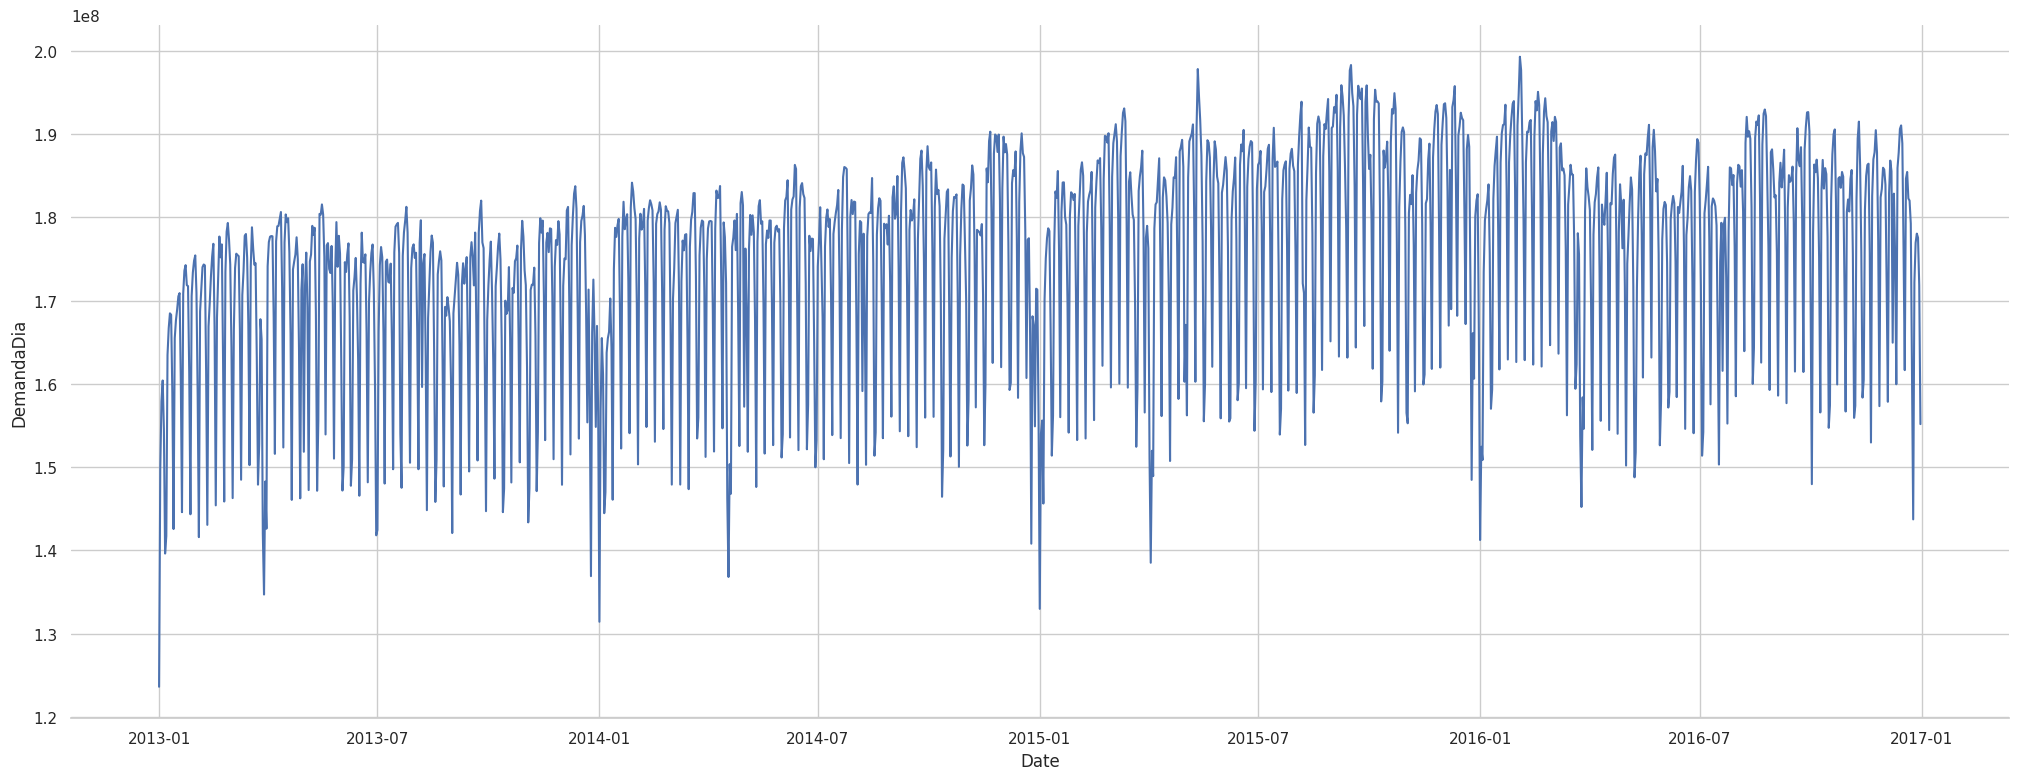

In [51]:
# Graficar la demanda
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.lineplot(data = df_Demdia, x='Date', y='DemandaDia')
sns.despine(left=True)

In [55]:
# Bajar el offset de los datos de tal manera que queda comparable un día del 2013 con uno del 2016
dataAux=df_Demdia.copy()
dateIni='2013-01-01'

iiter=0
delta=0
dmeanini=0
df_Aux=pd.DataFrame()
df_Fin=pd.DataFrame()
while df_Aux.shape[0]>1 or iiter==0:

    dateFin=str(pd.to_datetime(dateIni) + pd.Timedelta(days=30))
    df_Aux=dataAux[(dataAux.Date>=dateIni) & (dataAux.Date<=dateFin)]
    dmean=df_Aux['DemandaDia'].mean()

    if iiter>0:
        delta=max(0,dmean-demRef)
        df_Aux.loc[:,'DemandaDia']=df_Aux.loc[:,'DemandaDia']-delta
        df_Fin=pd.concat([df_Fin,df_Aux],axis=0)
    else:
        demRef=dmean
        df_Fin=pd.concat([df_Fin,df_Aux],axis=0)

    #dmeanini=dmean
    dateIni=str(pd.to_datetime(dateIni) + pd.Timedelta(days=31))
    iiter+=1

df_Demdia['DemCal']=df_Fin['DemandaDia']

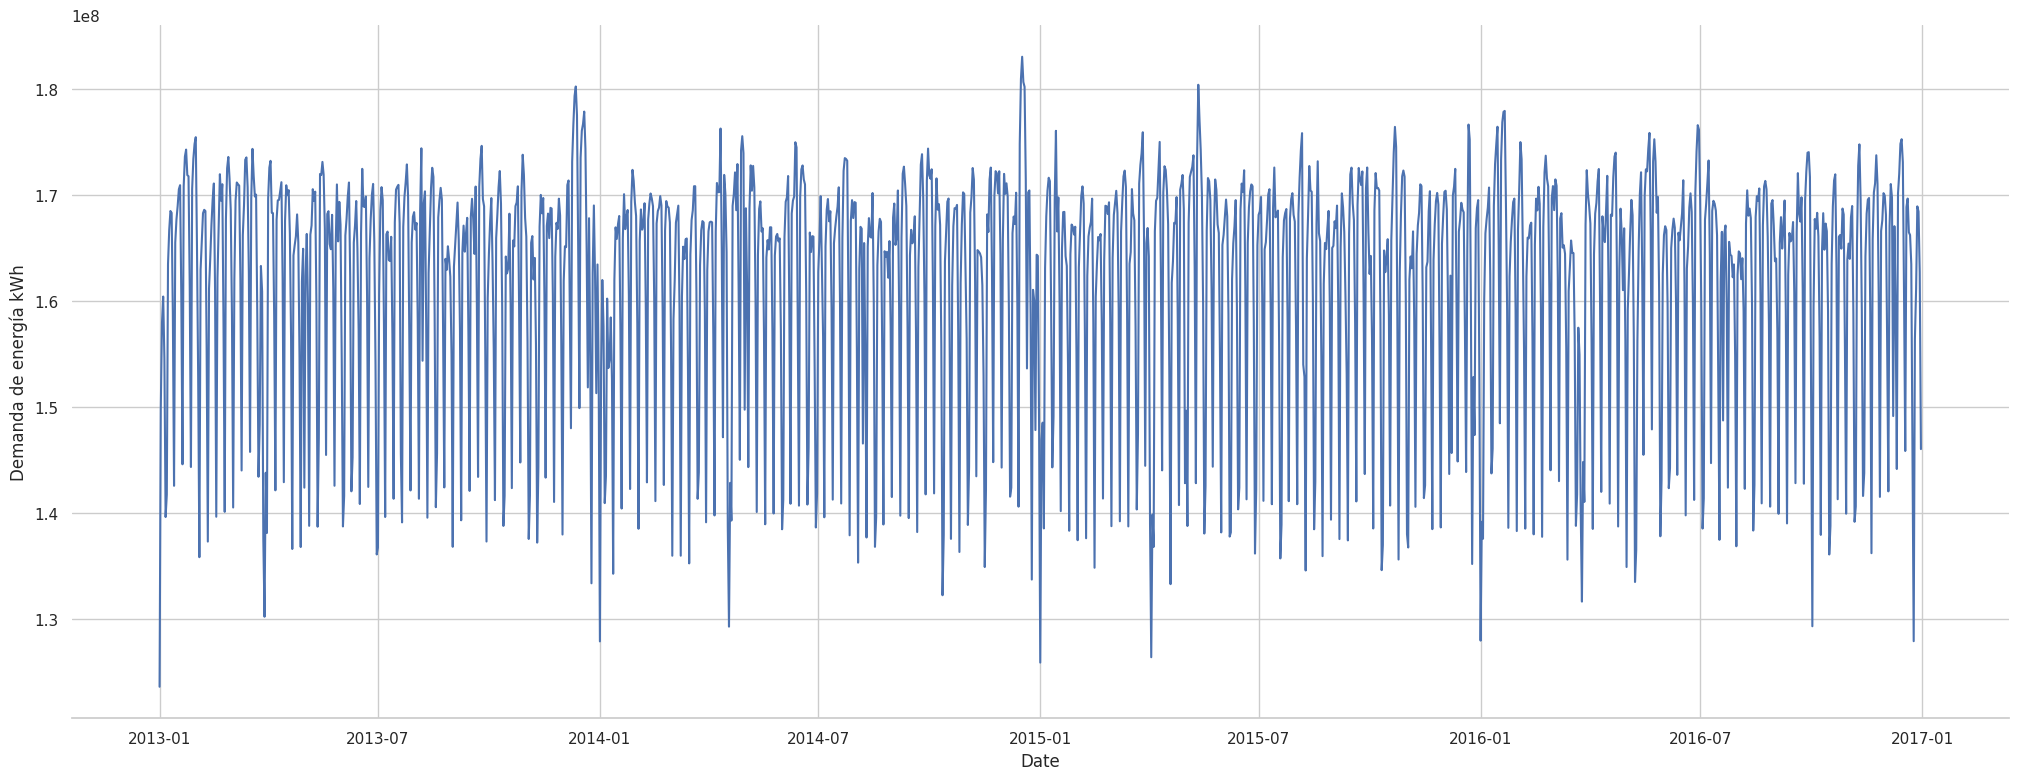

In [58]:
import matplotlib.pyplot as plt
# Graficar de nuevo los datos
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.set(font_scale=2)
sns.lineplot(data = df_Demdia, x='Date', y='DemCal')
ax.set_ylabel('Demanda de energía kWh')
ax.set_facecolor('white')
sns.despine(left=True)

### Clustering

Clasificación de datos según un comportamiento o por ciertas carácterísticas

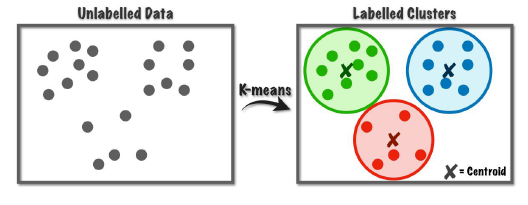




Ejemplo para clasificación de clientes

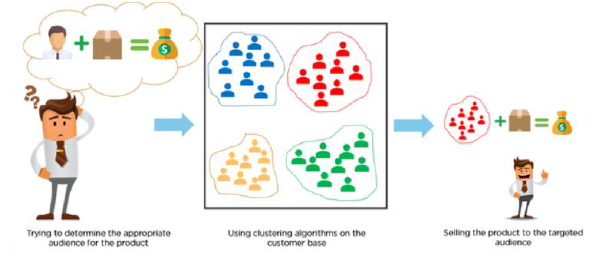

In [60]:
# importar librerías de sklear
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

In [64]:
# Convartir los datos en un arreglo (vector y transponerlo)
DemCal_arr=np.array(df_Demdia['DemCal'])
DemCal_arr = DemCal_arr.reshape(-1, 1)

In [65]:
DemCal_arr

array([[1.23639155e+08],
       [1.49866069e+08],
       [1.57917962e+08],
       ...,
       [1.68426067e+08],
       [1.62715876e+08],
       [1.46037536e+08]])

In [66]:
# Aplicar el método de la silueta para determincar el número de clusters optimo
lisk=[3,4,5,6,7] # Número de clusters a evaluar
lisSh=[]
for k in lisk:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(DemCal_arr)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(DemCal_arr, labels)
    lisSh.append(silhouette_avg)


In [67]:
# Observar resultados
print(lisk,lisSh)

[3, 4, 5, 6, 7] [0.6284024213536604, 0.5712518837318278, 0.5350506877265531, 0.528170369891932, 0.5280075755192557]


In [68]:
# Calcular los clusters con k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(DemCal_arr)
labels = kmeans.labels_
silhouette_avg = silhouette_score(DemCal_arr, labels)
print(silhouette_avg)

0.6284024213536604


In [69]:
# Validar las etiquetas asignadas a cada datos

In [70]:
my_list=list(labels)
unique_list = list(set(my_list))
print(unique_list)

[0, 1, 2]


In [71]:
# Contar el número de datos en cada etiqueta
for i in unique_list:
    # Count the number of times a value appears in the list
    value_to_count = i  # Change this to the value you want to count
    count = my_list.count(value_to_count)
    print(i,count)

0 281
1 827
2 353


In [72]:
#data_Label=df_Dem_ma.copy()
data_Label=df_Demdia.copy()
data_Label['day_cls']=my_list
data_Label.head(10)

,Date,DemandaDia,DemCal,day_cls
0,2013-01-01,1.236392e+08,1.236392e+08,0
1,2013-01-02,1.498661e+08,1.498661e+08,0
2,2013-01-03,1.579180e+08,1.579180e+08,2
3,2013-01-04,1.604141e+08,1.604141e+08,2
4,2013-01-05,1.545963e+08,1.545963e+08,2
5,2013-01-06,1.396336e+08,1.396336e+08,0
6,2013-01-07,1.417379e+08,1.417379e+08,0
7,2013-01-08,1.634736e+08,1.634736e+08,2
8,2013-01-09,1.667028e+08,1.667028e+08,1
9,2013-01-10,1.684772e+08,1.684772e+08,1


In [73]:
# Función para asignar los días de la semana a cada fecha, si es festivo es 4

import holidays
co_holidays = holidays.Colombia()

def typedays(row,weekday):

     if weekday==True:
          return row['Date'].weekday()
     else:
          if row['Date'] in co_holidays:
               return 4
          elif row['Date'].weekday()==5:
               return 2
          elif row['Date'].weekday()==6:
               return 3
          else:
               return 1

In [74]:
# Aplicar la función a cada fila del dataset
df_print=data_Label[['Date','day_cls']]
df_print['day_osf']=df_print.apply(lambda row: typedays(row,weekday=False),axis=1)
df_print['Typeday']=df_print.apply(lambda row: typedays(row,weekday=True),axis=1)

In [75]:
# Asignar la fecha como indice
df_print.set_index('Date', inplace=True)

In [79]:
df_print.head(20)

,day_cls,day_osf,Typeday
Date,,,
2013-01-01,0,4,1
2013-01-02,0,1,2
2013-01-03,2,1,3
2013-01-04,2,1,4
2013-01-05,2,2,5
2013-01-06,0,3,6
2013-01-07,0,4,0
2013-01-08,2,1,1
2013-01-09,1,1,2


In [83]:
# Definir Date como index
data_Label.set_index('Date', inplace=True)

In [84]:
# Agregar al dataset la demanda para graficar
df_print['Demanda']=data_Label.loc[:,'DemCal']

In [85]:
df_print.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-01-01 to 2016-12-31
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   day_cls  1461 non-null   int32  
 1   day_osf  1461 non-null   int64  
 2   Typeday  1461 non-null   int64  
 3   Demanda  1461 non-null   float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 51.4 KB


In [86]:
# Almacenar la infomración en un arreglo
nparray=np.array(df_print)

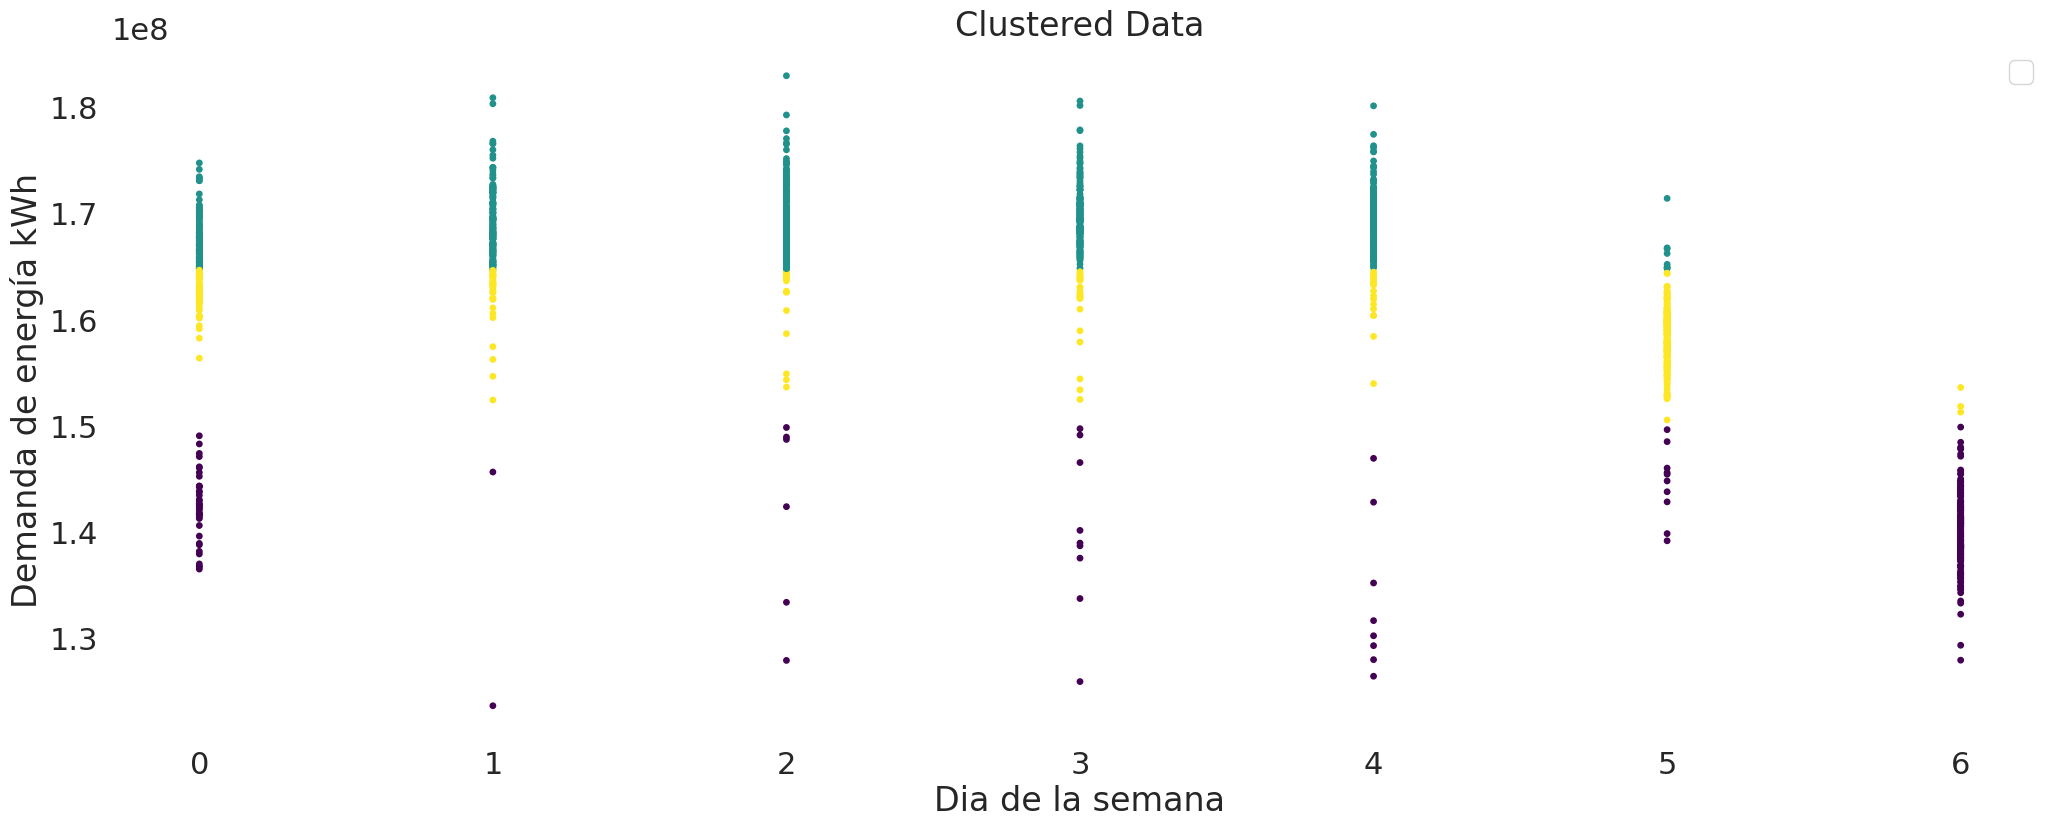

In [87]:
# Graficar según el día de la semana y la etiqueta
fig, ax = plt.subplots()
plt.scatter(nparray[:, 2], nparray[:, 3],c=nparray[:, 0], s=15, cmap='viridis')
plt.title("Clustered Data")
plt.xlabel('Dia de la semana')
plt.ylabel('Demanda de energía kWh')
ax.legend(facecolor='white')
ax.set_facecolor('white')
plt.show()